# Comparison of Diamond Characteristic Affect on Price vs. Actual Importance
What's most important to consider when purchasing a diamond?  Whether looking for a diamond for an engagement ring or just a really nice piece of jewelry, a diamond is among the larger purchases many people make.  Most people want to purchase a brilliant diamond with impressive sparkle (or scintillation and light return if you are a certified gemologist). According to diamond experts, the most important attributes that contribute to proper balance of scintillation and light return are the cut proportions, followed by color.  Some diamond experts even claim that a well-cut diamond appears significantly larger than a poor-cut diamond of the same size.

This project will investigate to see if the differences in diamond price reflect the attributes that are most important in creating brilliance and sparkle.  As part of the investigation, a model to predict diamond price will be created and factors most influential in determining diamond price will be examined.

***

## Data
The dataset used in this investigation was obtained from Kaggle.  It was uploaded by an unknown user, and the details of its origins are limited.  There are 53,940 rows (individual diamonds) and ten variables.    Columns are as follows:
1. carat: Carat weight of the diamond
2. cut: Describe cut quality of the diamond. Quality in increasing order- Poor, Fair, Good, Very Good, Premium, Ideal
3. color: Color of the diamond, with D being the best and Z the worst
4. clarity: How obvious inclusions are within the diamond. In order from best to worst- FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. depth %: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
6. table %: The width of the diamond's table expressed as a percentage of its average diameter
7. price: The price of the diamond in American Dollars
8. x-length: Length of the diamond in millimeters
9. y-width: Width of the diamond in millimeters
10. z-depth: Depth of the diamond in millimeters

There were no missing fields in the data.
 
***

## Research Focus
<br>
<font color=blue>**Are the features that are most reflected in pricing the same as those that are most important in creating brilliance and sparkle?**</font>

***

## Hypotheses

1. The attributes that most affect diamond price are somewhat different than the ones that most affect diamond scintillation and light return (sparkle & fire).
<br> 
<br>
2. The given price for a diamond can be statistically modeled and predicted using variables such as carat weight, color, and clarity.
<br> 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab 
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import time
import math
from scipy import stats
from sklearn import linear_model
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Importing data
diamonds = pd.read_csv('diamonds.csv')
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)

In [3]:
# Determing number of rows and columns
diamonds.shape

(53940, 10)

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Cut Quality

The manner in which a diamond is cut is known to be the most important factor in determining how it sparkles in the light.  The GIA (Gemological Institute of America) describes it this way:<br>When light enters a diamond, it travels through it, reflecting off its interior surfaces, called facets. It then either leaves the diamond as white light, called brightness, or it divides into the spectral colors of the rainbow: red, orange, yellow, green, blue and violet, called fire. As you or the diamond moves, an effect called scintillation occurs – visible as alternating flashes of white and spectral-colored light and the contrast of dark and light that moves around the diamond. This contrast is dynamic and causes, in layperson’s terms, sparkle.

Different grading systems have been used to describe the cut of a diamond.  In this data set, grades range from "fair" to "ideal." 

In [5]:
# Looking at cut quality categories
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

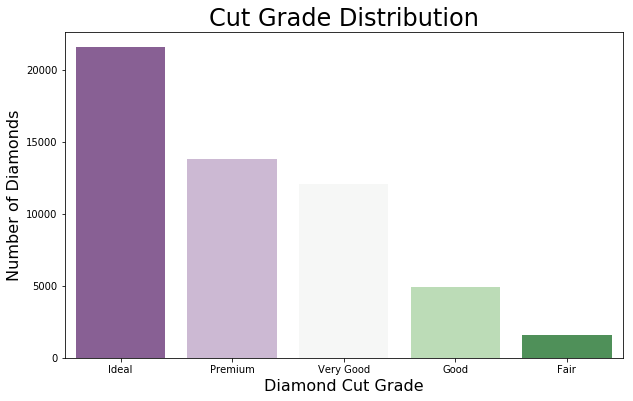

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=diamonds, palette='PRGn',
            order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
plt.title('Cut Grade Distribution', size=24)
plt.xlabel('Diamond Cut Grade', size=16)
plt.ylabel('Number of Diamonds', size=16)
plt.show()

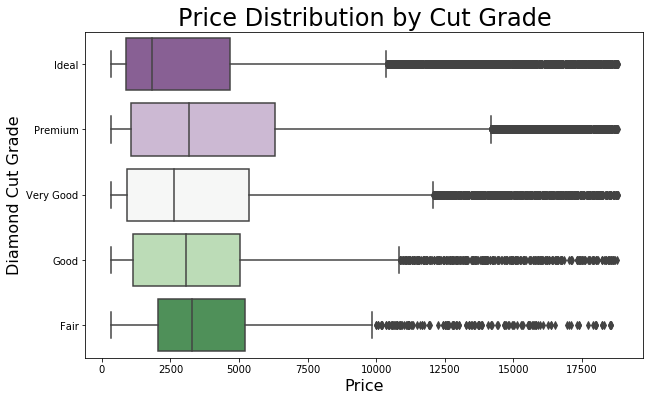

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='cut', data=diamonds, palette='PRGn',
            order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
plt.title('Price Distribution by Cut Grade', size=24)
plt.xlabel('Price', size=16)
plt.ylabel('Diamond Cut Grade', size=16)
plt.show()

We see that the highest number of diamonds falls within the ideal cut grade category, and number of diamonds in each consecutive category is lower.  Surprisingly, the median price seems to increase as cut grade decreases.  However, further analysis shows that diamonds of lower cut grade tended to be of higher carat weight within the sample, which would lead to higher prices within the lower cut grade categories.

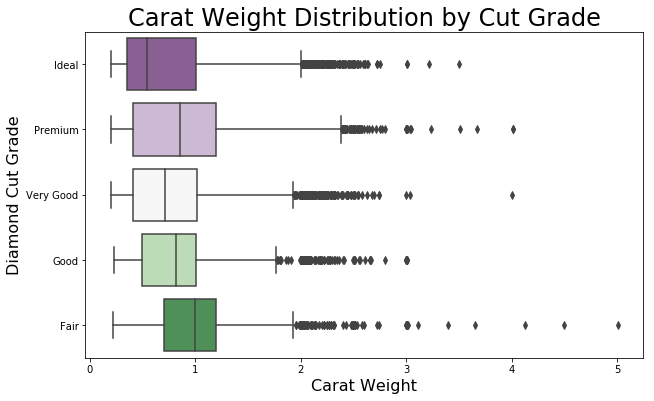

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='cut', data=diamonds, palette='PRGn',
            order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
plt.title('Carat Weight Distribution by Cut Grade', size=24)
plt.xlabel('Carat Weight', size=16)
plt.ylabel('Diamond Cut Grade', size=16)
plt.show()

## Clarity

Clarity grades are given to describe the visibleness of flaws found within a diamond.  Internally flawless diamonds have no flaws found within them, even with high magnification.  Diamonds falling within grades labelled from "very very slightly included" to "slightly included" have flaws that are mainly seen with varying degrees of magnification.  Diamonds with an "I1" grade (Included 1) possess flaws easily visible upon inspection without any magnification.  Obviously, diamonds with fewer flaws are more sought after.

In [9]:
# Looking at clarity quality categories
diamonds.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

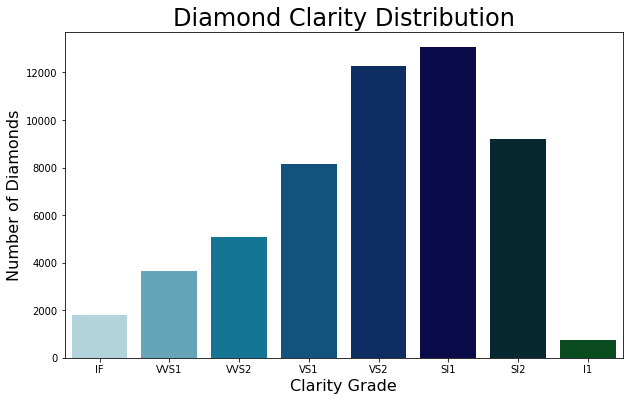

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='clarity', data=diamonds, palette='ocean_r',
            order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Diamond Clarity Distribution', size=24)
plt.xlabel('Clarity Grade', size=16)
plt.ylabel('Number of Diamonds', size=16)
plt.show()

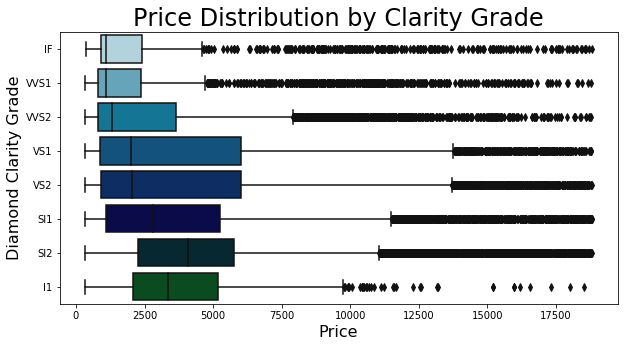

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', y='clarity', data=diamonds, palette='ocean_r',
            order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Price Distribution by Clarity Grade', size=24)
plt.xlabel('Price', size=16)
plt.ylabel('Diamond Clarity Grade', size=16)
plt.show()

Diamonds within the VS2 (Very Slightly Included 2) and SI1 (Slightly Included 1) categories are the most common within the samples.  I1 (Included 1) and IF (Internally Flawless) were the least common.  Again, median price is lowest with the highest clarity grades.  As shown below, this is also due to the tendancy for higher carat weight among lower graded diamonds.

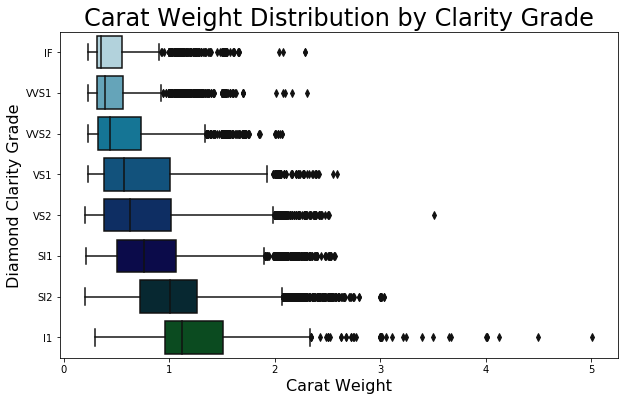

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='clarity', data=diamonds, palette='ocean_r',
            order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Carat Weight Distribution by Clarity Grade', size=24)
plt.xlabel('Carat Weight', size=16)
plt.ylabel('Diamond Clarity Grade', size=16)
plt.show()

## Color

Diamond color is graded on a scale from D to Z.  A diamond with a color grade of "D" is completely colorless, while a diamond with a color grade of "Z" is fairly yellow or brown.  Diamonds with a different perceivable color or have more color than a "Z" grade are referred to as "fancy-color" and do not fall into this system.  Among "white" diamonds, color as close to "D" as possible is viewed as preferable.

In [13]:
# Looking at color categories
diamonds.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

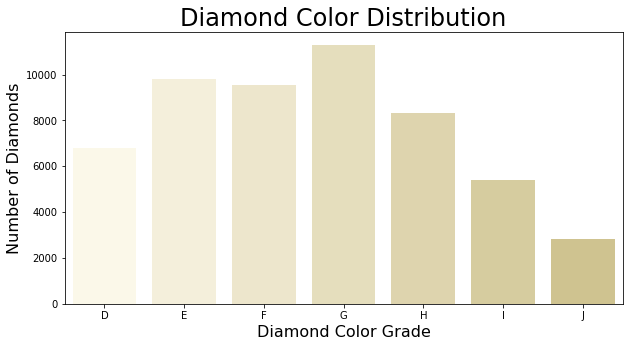

In [14]:
diam = sns.light_palette(color='dark mustard', input='xkcd', n_colors=15)
plt.figure(figsize=(10, 5))
sns.countplot(x='color', data=diamonds, palette=diam,
            order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Diamond Color Distribution', size=24)
plt.xlabel('Diamond Color Grade', size=16)
plt.ylabel('Number of Diamonds', size=16)
plt.show()

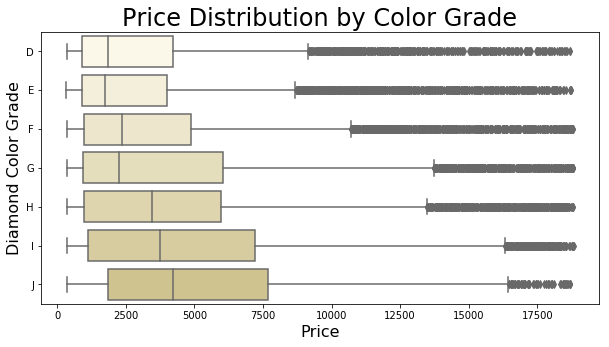

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', y='color', data=diamonds, palette=diam,
            order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Price Distribution by Color Grade', size=24)
plt.xlabel('Price', size=16)
plt.ylabel('Diamond Color Grade', size=16)
plt.show()

Again, higher median prices are found among the lower color grades, and again, there is a tendancy for the diamonds of lower color grade to possess higher carat weight.

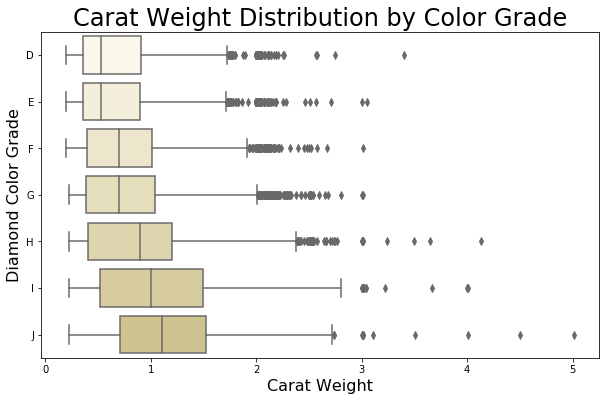

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='color', data=diamonds, palette=diam,
            order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Carat Weight Distribution by Color Grade', size=24)
plt.xlabel('Carat Weight', size=16)
plt.ylabel('Diamond Color Grade', size=16)
plt.show()

## Carat

Carat weight is the standard used to compare the mass of diamonds.  One carat is equivalent to 200 milligrams or 0.0070547924 ounces.  High-precision scales are used to measure the carat weight of a gemstone.

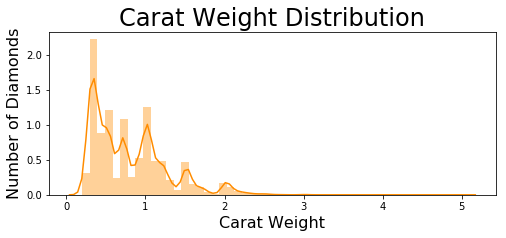

In [17]:
plt.figure(figsize=(8, 3))
sns.distplot(diamonds['carat'], color='darkorange', norm_hist=False)
plt.title('Carat Weight Distribution', size=24)
plt.xlabel('Carat Weight', size=16)
plt.ylabel('Number of Diamonds', size=16)
plt.show()

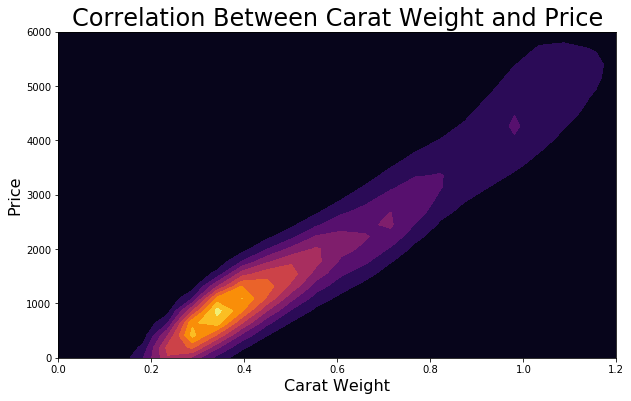

In [18]:
plt.figure(figsize=(10, 6))
plt.xlim([0, 1.2])
plt.ylim([-0, 6000])
sns.kdeplot(diamonds['carat'], diamonds['price'], shade=True, cmap='inferno')
plt.title('Correlation Between Carat Weight and Price', size=24)
plt.xlabel('Carat Weight', size=16)
plt.ylabel('Price', size=16)
plt.show()

The histogram shows an uneven distribution for the carat weight of the diamonds in the sample.  It appears that there are spikes at certain "benchmark" weights such as 1/3, 1/2, 3/4, 1, and 2 carats.  This is likely due to the fact that people are most likely to look for and buy diamonds in these weights.  The second graph shows a concentration of 1/3 carat diamonds with a price around $800.  In general, diamond price goes up with carat weight.

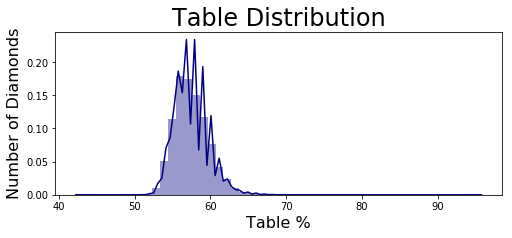

In [58]:
plt.figure(figsize=(8, 3))
sns.distplot(diamonds['table'], color='navy', norm_hist=False)
plt.title('Table Distribution', size=24)
plt.xlabel('Table %', size=16)
plt.ylabel('Number of Diamonds', size=16)
plt.show()

## Engineering Features to Create a Model

The categorical variables for cut, color, and clarity grades can be used to make ordinal ones, as there is a clear order for the categories found within each variable.

In [19]:
features = diamonds.replace({'cut' : {'Ideal':1, 'Premium':2, 'Very Good':3, 'Good':4, 'Fair':5}})
features = features.replace({'clarity' : {'SI2':8, 'SI1':7, 'VS1':5, 'VS2':6, 'VVS2':4, 'VVS1':3, 'I1':9, 'IF':2}})
features = features.replace({'color' : {'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10}})
features['price_per_carat'] = diamonds.price / diamonds.carat

In [20]:
# Making sure features are showing correctly
features.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,1,5,8,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,2,5,7,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,4,5,5,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,2,9,6,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,4,10,8,63.3,58.0,335,4.34,4.35,2.75,1080.645161


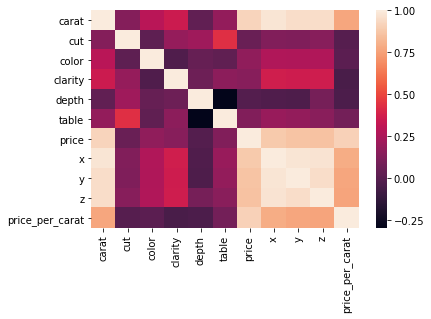

In [21]:
# Visualizing correlation between variables
sns.heatmap(features.corr())

In [22]:
# Looking into the correlation numbers
features.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
carat,1.000000,0.134967,0.291437,0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.769744
cut,0.134967,1.000000,0.020519,0.189175,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323,-0.005278
color,0.291437,0.020519,1.000000,-0.025631,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.012182
clarity,0.352841,0.189175,-0.025631,1.000000,0.067384,0.160327,0.146800,0.371999,0.358420,0.366952,-0.044731
depth,0.028224,0.218055,0.047279,0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.035669
table,0.181618,0.433405,0.026465,0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.084700
price,0.921591,0.053491,0.172511,0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.912377
x,0.975094,0.125565,0.270287,0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.787692
y,0.951722,0.121462,0.263584,0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.772065
z,0.953387,0.149323,0.268227,0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.765884


## Correlation between variables
Carat weight is highly correlated with the dimensions of the diamond (x, y, and z).  This makes sense, as larger dimensions would mean a greater diamond mass.  Since carat weight takes the dimensions into account, I am dropping x, y, and z from the model.

There is not much of a relationship between price and diamond depth, so I am dropping depth as well.

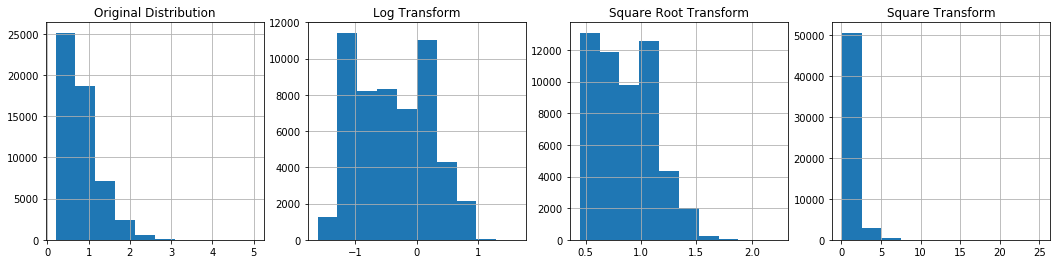

In [23]:
# Checking to see if transforming variable for carat size can normalize it
plt.figure(figsize=(18,4))
plt.subplot(141)
features.carat.hist()
plt.title('Original Distribution')

plt.subplot(142)
(np.log(features.carat)).hist()
plt.title('Log Transform')

plt.subplot(143)
(np.sqrt(features.carat)).hist()
plt.title('Square Root Transform')

plt.subplot(144)
(features.carat ** 2).hist()
plt.title('Square Transform')
plt.show()

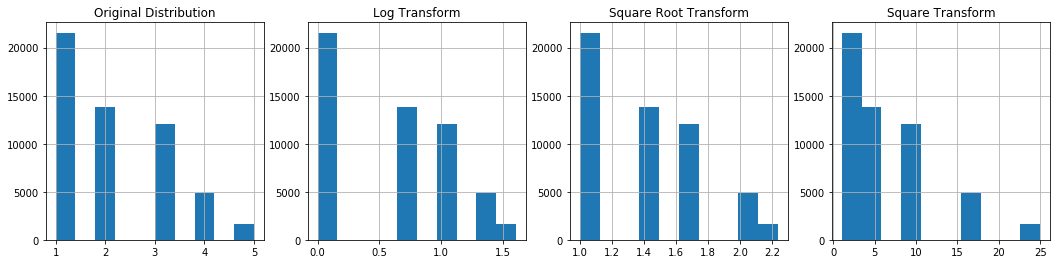

In [24]:
# Checking to see if transforming variable for cut quality can normalize it
plt.figure(figsize=(18,4))
plt.subplot(141)
features.cut.hist()
plt.title('Original Distribution')

plt.subplot(142)
(np.log(features.cut)).hist()
plt.title('Log Transform')

plt.subplot(143)
(np.sqrt(features.cut)).hist()
plt.title('Square Root Transform')

plt.subplot(144)
(features.cut ** 2).hist()
plt.title('Square Transform')
plt.show()

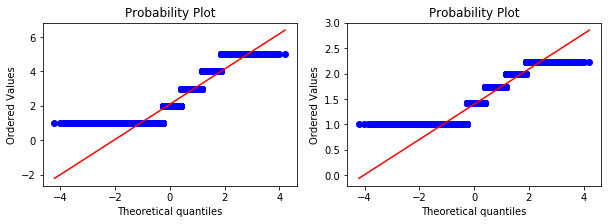

In [25]:
# QQ to check for normality
plt.figure(figsize=(10,3))
plt.subplot(121)
stats.probplot(features.cut, dist="norm", plot=pylab)

plt.subplot(122)
stats.probplot(np.sqrt(features.cut), dist="norm", plot=pylab)
pylab.show()

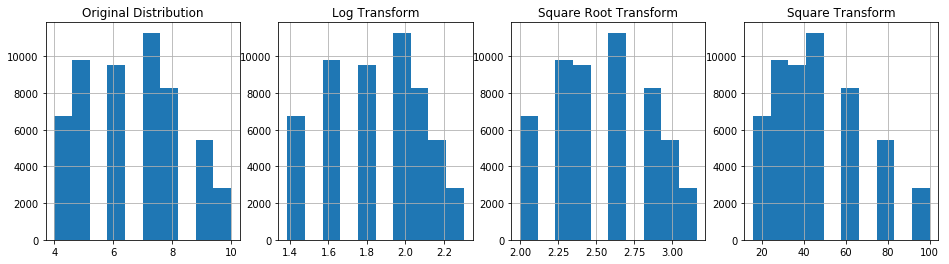

In [26]:
# Checking to see if transforming variable for color can normalize it
plt.figure(figsize=(16,4))
plt.subplot(141)
features.color.hist()
plt.title('Original Distribution')

plt.subplot(142)
(np.log(features.color)).hist()
plt.title('Log Transform')

plt.subplot(143)
(np.sqrt(features.color)).hist()
plt.title('Square Root Transform')

plt.subplot(144)
(features.color ** 2).hist()
plt.title('Square Transform')
plt.show()

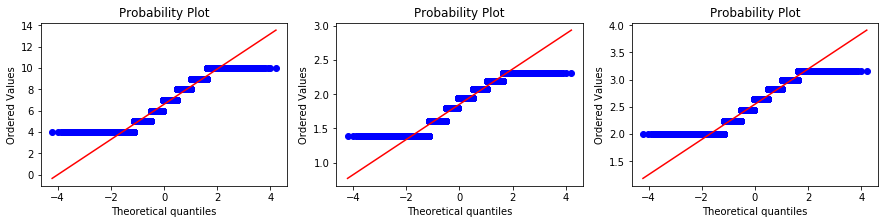

In [27]:
# QQ to check for normality
plt.figure(figsize=(15,3))
plt.subplot(131)
stats.probplot(features.color, dist="norm", plot=pylab)

plt.subplot(132)
stats.probplot(np.log(features.color), dist="norm", plot=pylab)

plt.subplot(133)
stats.probplot(np.sqrt(features.color), dist="norm", plot=pylab)
pylab.show()

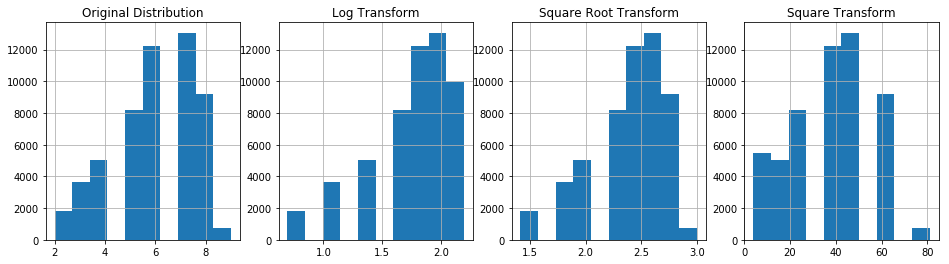

In [28]:
# Checking to see if transforming variable for clarity can normalize it
plt.figure(figsize=(16,4))
plt.subplot(141)
features.clarity.hist()
plt.title('Original Distribution')

plt.subplot(142)
(np.log(features.clarity)).hist()
plt.title('Log Transform')

plt.subplot(143)
(np.sqrt(features.clarity)).hist()
plt.title('Square Root Transform')

plt.subplot(144)
(features.clarity ** 2).hist()
plt.title('Square Transform')
plt.show()

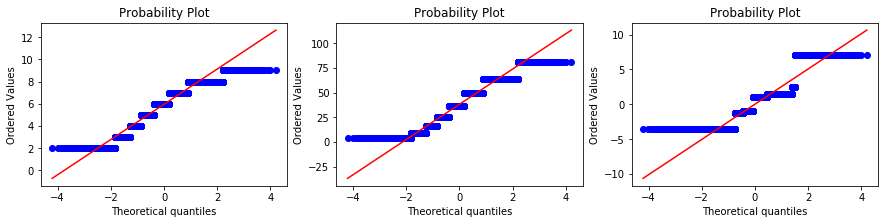

In [29]:
# QQ to check for normality
plt.figure(figsize=(15,3))
plt.subplot(131)
stats.probplot(features.clarity, dist="norm", plot=pylab)

plt.subplot(132)
stats.probplot(features.clarity ** 2, dist="norm", plot=pylab)

plt.subplot(133)
stats.probplot(1 / np.sin(features.clarity), dist="norm", plot=pylab)
pylab.show()

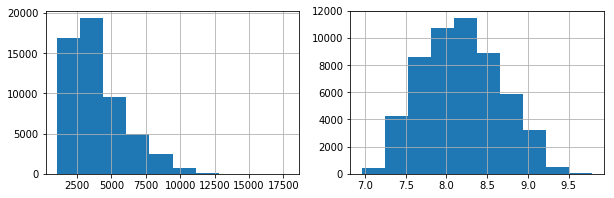

In [30]:
# Checking to see if transforming variable for price_per_carat can normalize it
plt.figure(figsize=(10,3))

plt.subplot(121)
features.price_per_carat.hist()

plt.subplot(122)
(np.log(features.price_per_carat)).hist()

In [31]:
# Modifying features for normality
features['carat'] = np.log(features.carat)
features['price'] = np.log(features.price)
features['price_per_carat'] = np.log(features.price_per_carat)

In [32]:
features.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,-1.469676,1,5,8,61.5,55.0,5.786897,3.95,3.98,2.43,7.256573
1,-1.560648,2,5,7,59.8,61.0,5.786897,3.89,3.84,2.31,7.347545
2,-1.469676,4,5,5,56.9,65.0,5.789960,4.05,4.07,2.31,7.259636
3,-1.237874,2,9,6,62.4,58.0,5.811141,4.20,4.23,2.63,7.049015
4,-1.171183,4,10,8,63.3,58.0,5.814131,4.34,4.35,2.75,6.985314


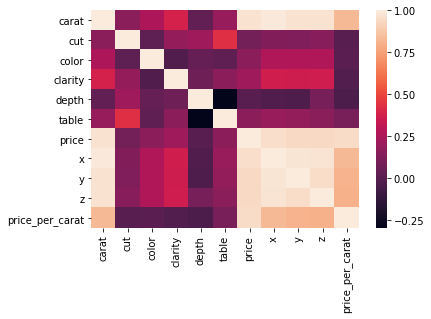

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
carat,1.000000,0.150701,0.259951,0.384908,0.030434,0.191741,0.965914,0.990166,0.966495,0.969060,0.832861
cut,0.150701,1.000000,0.020519,0.189175,0.218055,0.433405,0.087535,0.125565,0.121462,0.149323,0.001439
color,0.259951,0.020519,1.000000,-0.025631,0.047279,0.026465,0.154977,0.270287,0.263584,0.268227,0.011002
clarity,0.384908,0.189175,-0.025631,1.000000,0.067384,0.160327,0.213437,0.371999,0.358420,0.366952,-0.017998
depth,0.030434,0.218055,0.047279,0.067384,1.000000,-0.295779,0.000860,-0.025289,-0.029341,0.094924,-0.035667
table,0.191741,0.433405,0.026465,0.160327,-0.295779,1.000000,0.158208,0.195344,0.183760,0.150929,0.101971
price,0.965914,0.087535,0.154977,0.213437,0.000860,0.158208,1.000000,0.958010,0.936173,0.935218,0.947749
x,0.990166,0.125565,0.270287,0.371999,-0.025289,0.195344,0.958010,1.000000,0.974701,0.970772,0.828081
y,0.966495,0.121462,0.263584,0.358420,-0.029341,0.183760,0.936173,0.974701,1.000000,0.952006,0.810563
z,0.969060,0.149323,0.268227,0.366952,0.094924,0.150929,0.935218,0.970772,0.952006,1.000000,0.805360


In [33]:
# Looking at correlation between new features
sns.heatmap(features.corr())
plt.show()

features.corr()

In [34]:
X = features[['carat', 'cut', 'color', 'clarity', 'table']]
y = features.price

## Linear Regression
The linear regression does an okay job of predicting diamond price in many cases, with an R^2 value of .9792.  It is not a great model, however, as it has a major overfitting issue.  L1 and L2 regularization provide only trivial help in increasing performance of the model.

In [35]:
regr = linear_model.LinearRegression()
time1 = time.time()
regr.fit(X, y)

print('R-squared Value')
print(regr.score(X, y))

kf = KFold(n_splits=5)
kf.get_n_splits(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scores = []
for train, test in kf.split(X):
    regr.fit(X.iloc[train], y.iloc[train])
    scores.append(regr.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9792243448981248


--Average Cross Validation Score--
0.8907807543644193


--Runtime: 0.07064104080200195 seconds--


In [37]:
# Checking ridge regression model fit with different alpha values
alpha_tune = []
for i in [1, 10, 20, 30, 40, 50, 100]:
    ridge = linear_model.Ridge(alpha=i)
    ridge.fit(X, y)
    r2_score = ridge.score(X, y)
    scores = []
    for train, test in kf.split(X):
        ridge.fit(X.iloc[train], y.iloc[train])
        scores.append(ridge.score(X.iloc[test], y.iloc[test]))
        min_crossval_score = min(scores)
    alpha_tune.append([i, r2_score, min_crossval_score])
    
alpha_tune = pd.DataFrame(alpha_tune)
alpha_tune.columns = ['alpha_value', 'r2_score', 'min_crossval_score']

display(alpha_tune)

,alpha_value,r2_score,min_crossval_score
0,1,0.979224,0.635046
1,10,0.979224,0.635101
2,20,0.979223,0.635136
3,30,0.979220,0.635147
4,40,0.979217,0.635131
5,50,0.979213,0.635091
6,100,0.979179,0.634510


In [36]:
# Checking lasso regression model fit with different alpha values
alpha_tune = []
for i in [.00001, .0001, .001, .003, .005, .008, .01, .02, .05]:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X, y)
    r2_score = lasso.score(X, y)
    scores = []
    for train, test in kf.split(X):
        lasso.fit(X.iloc[train], y.iloc[train])
        scores.append(lasso.score(X.iloc[test], y.iloc[test]))
        min_crossval_score = min(scores)
    alpha_tune.append([i, r2_score, min_crossval_score])
    
alpha_tune = pd.DataFrame(alpha_tune)
alpha_tune.columns = ['alpha_value', 'r2_score', 'min_crossval_score']

display(alpha_tune)

,alpha_value,r2_score,min_crossval_score
0,0.00001,0.979224,0.635046
1,0.00010,0.979224,0.635121
2,0.00100,0.979217,0.635809
3,0.00300,0.979158,0.636770
4,0.00500,0.979042,0.636950
5,0.00800,0.978762,0.635501
6,0.01000,0.978503,0.633511
7,0.02000,0.976351,0.612118
8,0.05000,0.962431,0.443859


In [54]:
lasso = linear_model.Lasso(alpha=.005)
time1 = time.time()
lasso.fit(X, y)

print('R-squared Value')
print(lasso.score(X, y))

scores = []
for train, test in kf.split(X):
    lasso.fit(X.iloc[train], y.iloc[train])
    scores.append(lasso.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9790424546676428


--Average Cross Validation Score--
0.8910724532614076


--Runtime: 0.07166028022766113 seconds--


## Random Forest
The random forest regression is even worse with overfitting.  Correlation was very high (with an R2 value of .9952), but in cross-validation, an R-squared value of .2832 was returned on the best random forest model.

In [38]:
# Testing for ideal parameters
mid_tune = []
for i in [.0000005, .0000008, .000001, .0000015, .000002]:
    rfc = ensemble.RandomForestRegressor(n_estimators=100, min_impurity_decrease=i, n_jobs=-1)
    rfc.fit(X, y)
    r2_score = rfc.score(X, y)
    scores = []
    for train, test in kf.split(X):
        rfc.fit(X.iloc[train], y.iloc[train])
        scores.append(rfc.score(X.iloc[test], y.iloc[test]))
        min_crossval_score = min(scores)
    mid_tune.append([i, r2_score, min_crossval_score])
    
mid_tune = pd.DataFrame(mid_tune)
mid_tune.columns = ['min_impurity_decrease_value', 'r2_score', 'crossval_score']

display(mid_tune)

,min_impurity_decrease_value,r2_score,crossval_score
0,5.000000e-07,0.993641,0.252996
1,8.000000e-07,0.992969,0.290720
2,1.000000e-06,0.992647,0.269038
3,1.500000e-06,0.992041,0.272611
4,2.000000e-06,0.991623,0.274283


In [39]:
rfc = ensemble.RandomForestRegressor(n_estimators=100, min_impurity_decrease=.0000008, n_jobs=-1)
time1 = time.time()
rfc.fit(X, y)

print('R-squared Value')
print(rfc.score(X, y))

scores = []
for train, test in kf.split(X):
    rfc.fit(X.iloc[train], y.iloc[train])
    scores.append(rfc.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9929713449177037


--Average Cross Validation Score--
0.7439490411626088


--Runtime: 6.797053337097168 seconds--


In [40]:
rfc = ensemble.RandomForestRegressor(n_estimators=1000, min_impurity_decrease=.0000008, n_jobs=-1)
time1 = time.time()
rfc.fit(X, y)

print('R-squared Value')
print(rfc.score(X, y))

scores = []
for train, test in kf.split(X):
    rfc.fit(X.iloc[train], y.iloc[train])
    scores.append(rfc.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.992998352920663


--Average Cross Validation Score--
0.7459212540554482


--Runtime: 60.88717794418335 seconds--


## Gradient Boosting
The gradient boosting model isn't looking great either when it comes to cross-validation, but it does perform better than the random forest model.

In [41]:
time1 = time.time()
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.06, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

print('R-squared Value')
print(clf.score(X, y))

scores = []
for train, test in kf.split(X):
    clf.fit(X.iloc[train], y.iloc[train])
    scores.append(clf.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9910675452121075


--Average Cross Validation Score--
0.8475746325262585


--Runtime: 86.90716028213501 seconds--


In [42]:
time1 = time.time()
params = {'n_estimators': 2000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.06, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

print('R-squared Value')
print(clf.score(X, y))

scores = []
for train, test in kf.split(X):
    clf.fit(X.iloc[train], y.iloc[train])
    scores.append(clf.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9914086356366941


--Average Cross Validation Score--
0.8549451693301213


--Runtime: 172.53307461738586 seconds--


## Support Vector Machine
This is the best-performing model, but it does take a while to run.  The .913 R-squared value in cross-validation might justify the 11 minutes it took to run though.

In [43]:
svr = SVR(C=1)
time1 = time.time()
svr.fit(X, y)

print('R-squared Value')
print(svr.score(X, y))

scores = []
for train, test in kf.split(X):
    svr.fit(X.iloc[train], y.iloc[train])
    scores.append(svr.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9880499061735765


--Average Cross Validation Score--
0.9128761046328439


--Runtime: 660.0739874839783 seconds--


##  K Nearest Neighbors
This model performs rather poorly in cross-validation, so it should be dropped.

In [44]:
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
time1 = time.time()
knn.fit(X, y)

print('R-squared Value')
print(knn.score(X, y))

scores = []
for train, test in kf.split(X):
    knn.fit(X.iloc[train], y.iloc[train])
    scores.append(knn.score(X.iloc[test], y.iloc[test]))
    
print('\n')
print('--Average Cross Validation Score--')
print(np.mean(scores))
print('\n')
print('--Runtime: %s seconds--' % (time.time() - time1))

R-squared Value
0.9956821263994483


--Average Cross Validation Score--
0.42059741059005085


--Runtime: 3.6659293174743652 seconds--


# Diamond Attributes Most Used to Predict Price

In [45]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances) [::-1]
for f in range(X.shape[1]):
    print("%d. (%f) %s" % (f + 1, importances[indices[f]], X.columns[indices[f]]))

1. (0.377099) carat
2. (0.189794) clarity
3. (0.171662) table
4. (0.144221) color
5. (0.117225) cut


# Clarity vs. Cut
As previously stated, experts generally agree that cut is more important than clarity in determining the beauty of a diamond.  However, that is not reflected in the price.

The plots below demonstrate how price is much more affected by clarity than cut.  The regression lines for the different clarity grades have a significant spread between them.  On the other hand, the regression lines for the different cut grades are fairly close together.  In fact, price values along the regression line for very good cut diamonds are higher than those for premium cut diamonds at the same grade, which is the opposite of what you would expect.

In [46]:
diamonds = diamonds.replace({'clarity' : {'SI2':'Slightly Included', 'SI1':'Slightly Included',
                                          'VS1':'Very Slightly Included', 'VS2':'Very Slightly Included',
                                          'VVS2':'Very Very Slightly Included', 'VVS1':'Very Very Slightly Included',
                                          'I1':'Included', 'IF':'Flawless'}})

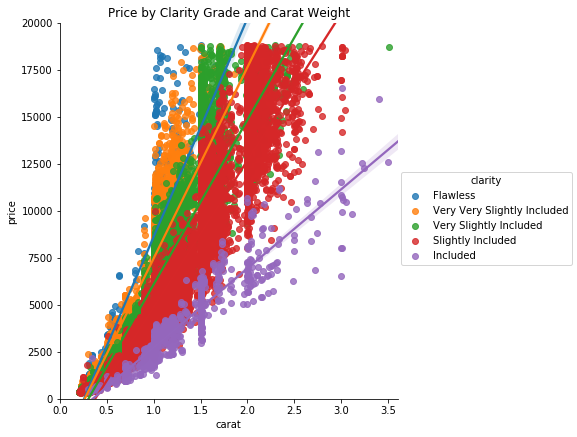

In [47]:
sns.lmplot(x='carat', y='price', hue='clarity', data=diamonds, size=6, hue_order=['Flawless',
    'Very Very Slightly Included', 'Very Slightly Included', 'Slightly Included', 'Included'])
plt.title('Price by Clarity Grade and Carat Weight')
plt.xlim(0, 3.6)
plt.ylim(0, 20000)
plt.show()

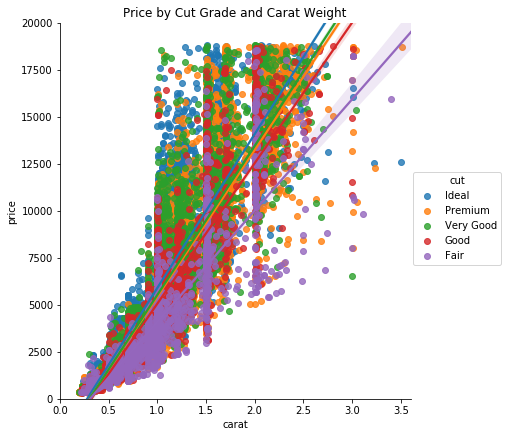

In [48]:
sns.lmplot(x='carat', y='price', hue='cut', data=diamonds, size=6, hue_order= ['Ideal',
          'Premium', 'Very Good', 'Good', 'Fair'])
plt.title('Price by Cut Grade and Carat Weight')
plt.xlim(0, 3.6)
plt.ylim(0, 20000)
plt.show()

In [49]:
# Creating new dataframe of diamonds with similar features for a fair comparison
features2 = features[(features.color <=6) & (features.carat >= .3) & (features.carat <= 1.7)]

# Modifying variable price_per_carat to more understandable value
features2['price_per_carat'] = np.log(diamonds.price/diamonds.carat)*480

In [50]:
clps = pd.DataFrame((features2[features2.clarity == 2].price_per_carat).describe())
clps.columns = ['if_clarity_price']
clps1 = pd.DataFrame((features2[(features2.clarity == 3) | (features2.clarity == 4)].price_per_carat).describe())
clps1.columns = ['vvs_clarity_price']
clps2 = pd.DataFrame((features2[(features2.clarity == 5) | (features2.clarity == 6)].price_per_carat).describe())
clps2.columns = ['vs_clarity_price']
clps3 = pd.DataFrame((features2[(features2.clarity == 7) | (features2.clarity == 8)].price_per_carat).describe())
clps3.columns = ['si_clarity_price']
clps4 = pd.DataFrame((features2[features2.clarity == 9].price_per_carat).describe())
clps4.columns = ['i_clarity_price']
clps = clps.join((clps1, clps2, clps3, clps4))

cups = pd.DataFrame((features2[features2.cut == 1].price_per_carat).describe())
cups.columns = ['ideal_cut_price']
cups1 = pd.DataFrame((features2[features2.cut == 2].price_per_carat).describe())
cups1.columns = ['premium_cut_price']
cups2 = pd.DataFrame((features2[features2.cut == 3].price_per_carat).describe())
cups2.columns = ['very_good_cut_price']
cups3 = pd.DataFrame((features2[features2.cut == 4].price_per_carat).describe())
cups3.columns = ['good_cut_price']
cups4 = pd.DataFrame((features2[features2.cut == 5].price_per_carat).describe())
cups4.columns = ['fair_cut_price']
cups = cups.join((cups1, cups2, cups3, cups4))

display(clps)
display(cups)

,if_clarity_price,vvs_clarity_price,vs_clarity_price,si_clarity_price,i_clarity_price
count,3.000000,35.000000,428.000000,1117.000000,62.000000
mean,4522.878859,4475.617354,4401.922249,4246.830310,3941.367311
std,14.829597,38.432638,53.213234,90.119852,101.592693
min,4508.000668,4380.249172,4161.463343,3932.198711,3658.588157
25%,4515.488599,4464.769229,4375.799735,4188.399387,3892.652473
50%,4522.976530,4480.189720,4406.624856,4261.777971,3946.886602
75%,4530.317954,4497.722856,4439.297576,4318.340904,4002.661164
max,4537.659379,4552.636272,4524.345001,4405.995573,4120.055514


,ideal_cut_price,premium_cut_price,very_good_cut_price,good_cut_price,fair_cut_price
count,388.000000,596.000000,395.000000,184.000000,82.000000
mean,4317.499070,4281.559358,4294.182991,4231.632765,4152.322792
std,111.671072,123.816204,110.082401,148.103718,158.708232
min,3932.198711,3759.366807,3919.708045,3658.588157,3750.300323
25%,4248.909721,4199.186358,4221.983688,4152.163053,4061.501423
50%,4327.230849,4300.059683,4303.969955,4267.643549,4166.080521
75%,4394.870477,4374.503950,4370.344920,4333.269597,4278.801907
max,4552.636272,4516.802284,4537.659379,4493.554805,4462.739506


As shown in the tables, the difference in price by clarity grade (mean prices from \$3941 to \$4522) is much more significant that the difference in price by cut grade (mean prices ranging from \$4152 to \$4317) among this group of diamonds.

# Which would you rather have?
Look at the price predictions for the two hypothetical diamonds below.  Both are one-carat diamonds with no perceivable color.  

The first has impeccable clarity, meaning no imperfections within the diamond.  However, the dimensions of the diamond allow much of the light entering the diamond to exit through the bottom.  The result is lower light return through the facets at the top of the diamond, meaning less "sparkle."

The second has S2 clarity (imperfections would be easily spotted with 10x magnification, but difficult to discern with the naked eye).  However, the dimensions of the diamond allow practically all of the light entering it to be returned to the top of the diamond, resulting in impressive "sparkle."

The first has a predicted price of \$10,509 and the second \$5,374.  If I am choosing, there is no question that I go with the diamond that twinkles brightly and costs just over half the price of the other.

In [51]:
# Price prediction for a 1-carat, fair-cut diamond with E-color, IF clarity, and 50% table width
round(math.exp(rfc.predict([[np.log(1), 5, 5, 1, 50]])), 2)

10524.44

In [52]:
# Price prediction for a 1-carat, ideal-cut diamond with E-color, S2 clarity, and 58% table width
round(math.exp(rfc.predict([[np.log(1), 1, 5, 7, 58]])), 2)

5353.86

# Want to save even more?
Buying a diamond just under a carat leads to even more savings.  You would not likely be able to tell the difference in a full-carat diamond and one that just falls short of a carat.  A 0.97 carat diamond with the same characteristics as the one above is predicted to have a price of \$4809, a savings of \$531!

In [53]:
# Price prediction for a 1-carat, ideal-cut diamond with E-color, S2 clarity, and 58% table width
round(math.exp(rfc.predict([[np.log(.97), 1, 5, 7, 58]])), 2)

4737.8